# Análisis Exploratorio de Datos (EDA) - Informe de Felicidad Mundial

Este notebook realiza un análisis exploratorio de los datos del Informe de Felicidad Mundial, que incluye métricas como el puntaje de felicidad, PIB per cápita, apoyo social, esperanza de vida, libertad, percepción de corrupción y generosidad. El objetivo es explorar las relaciones entre estas variables, identificar patrones mediante clustering y extraer conclusiones sobre los factores que influyen en la felicidad global.



### Importación de Librerías
En esta celda, se importan las librerías necesarias para realizar el análisis exploratorio de datos, incluyendo manipulación de datos, visualización, clustering y análisis estadístico.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
import plotly.express as px
from sklearn.decomposition import PCA



### Lectura del Archivo CSV
Se carga el conjunto de datos desde un archivo CSV que contiene los datos combinados del Informe de Felicidad Mundial.

In [68]:
df = pd.read_csv('C:/Users/Acer/OneDrive/Escritorio/Workshops y Proyectos/workshop3/datos/combined_happiness_data.csv')

### Vista Preliminar de los Datos
Se muestran las primeras filas del DataFrame para obtener una vista preliminar de los datos y confirmar que se cargaron correctamente.

In [69]:
df.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Lower_Confidence_Interval,Upper_Confidence_Interval,Whisker_High,Whisker_Low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


### Inspección de la Estructura del DataFrame
Se utiliza el método `info()` para inspeccionar los tipos de datos, la cantidad de entradas y la presencia de valores nulos en cada columna.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Region                     763 non-null    object 
 2   Happiness_Rank             782 non-null    int64  
 3   Happiness_Score            782 non-null    float64
 4   Standard_Error             158 non-null    float64
 5   GDP_per_Capita             782 non-null    float64
 6   Social_Support             782 non-null    float64
 7   Life_Expectancy            782 non-null    float64
 8   Freedom                    782 non-null    float64
 9   Corruption_Perception      782 non-null    float64
 10  Generosity                 782 non-null    float64
 11  Dystopia_Residual          470 non-null    float64
 12  Year                       782 non-null    int64  
 13  Lower_Confidence_Interval  157 non-null    float64

### Dimensiones del DataFrame
Se obtienen las dimensiones del DataFrame (número de filas y columnas) para entender el tamaño del conjunto de datos.

In [71]:
df.shape

(782, 17)

### Listado de Columnas
Se extrae y muestra la lista de nombres de las columnas del DataFrame para facilitar su referencia en el análisis.

In [72]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness_Rank',
 'Happiness_Score',
 'Standard_Error',
 'GDP_per_Capita',
 'Social_Support',
 'Life_Expectancy',
 'Freedom',
 'Corruption_Perception',
 'Generosity',
 'Dystopia_Residual',
 'Year',
 'Lower_Confidence_Interval',
 'Upper_Confidence_Interval',
 'Whisker_High',
 'Whisker_Low']

### Análisis de Valores Nulos
Se calcula el número de valores nulos por columna para identificar posibles problemas de calidad en los datos.

In [73]:
missing_values = df.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

Valores nulos por columna:
 Country                        0
Region                        19
Happiness_Rank                 0
Happiness_Score                0
Standard_Error               624
GDP_per_Capita                 0
Social_Support                 0
Life_Expectancy                0
Freedom                        0
Corruption_Perception          0
Generosity                     0
Dystopia_Residual            312
Year                           0
Lower_Confidence_Interval    625
Upper_Confidence_Interval    625
Whisker_High                 627
Whisker_Low                  627
dtype: int64


## Eliminación de Columnas con Alta Proporción de Nulos
Se eliminan columnas con más del 50% de valores nulos (Standard_Error, Lower_Confidence_Interval, Upper_Confidence_Interval, Whisker_High, Whisker_Low), ya que aportan poca información útil para el análisis.


In [74]:
df.drop(columns=[
    "Standard_Error",                # 624 nulos (de ~627): casi toda la columna está vacía.
    "Lower_Confidence_Interval",     # 625 nulos: más del 99% nulos.
    "Upper_Confidence_Interval",     # 625 nulos: igual.
    "Whisker_High",                  # 627 nulos: completamente nula o inútil para análisis general.
    "Whisker_Low"                    # 627 nulos: igual.
], inplace=True)

### Justificación: Rellenar con "Unknown" mantiene la mayor parte del dataset y permite agrupar por región sin errores.

In [75]:
df['Region'].fillna("Unknown", inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_22928\1544613156.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## Verificación de Valores Nulos Post-Limpieza
Esta celda vuelve a verificar la cantidad de valores faltantes en el DataFrame después de eliminar columnas para confirmar la efectividad del proceso de limpieza.

In [76]:
df.isnull().sum()


Country                    0
Region                     0
Happiness_Rank             0
Happiness_Score            0
GDP_per_Capita             0
Social_Support             0
Life_Expectancy            0
Freedom                    0
Corruption_Perception      0
Generosity                 0
Dystopia_Residual        312
Year                       0
dtype: int64

### Verificación de Duplicados
Se comprueba si existen filas duplicadas en el DataFrame.

In [77]:
duplicates = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicates}")


Número de filas duplicadas: 0


### Tipos de Datos
Se revisan los tipos de datos de cada columna para confirmar que son apropiados para el análisis.

In [78]:
df.dtypes

Country                   object
Region                    object
Happiness_Rank             int64
Happiness_Score          float64
GDP_per_Capita           float64
Social_Support           float64
Life_Expectancy          float64
Freedom                  float64
Corruption_Perception    float64
Generosity               float64
Dystopia_Residual        float64
Year                       int64
dtype: object

## Análisis Descriptivo

### Estadísticas Descriptivas
Se generan estadísticas descriptivas (conteo, media, desviación estándar, mínimo, máximo, etc.) para las variables numéricas, proporcionando una visión general de la distribución de los datos.

In [79]:
df.describe()

,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,470.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125380,0.218576,2.092717,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105760,0.122321,0.565772,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000,1.737975,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.090905,0.201982,2.094640,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.155861,0.278832,2.455575,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720,2019.000000


##  Análisis de Clustering

### Aplicación de K-Means
Se aplica el algoritmo K-Means con 4 clusters para agrupar los países según los factores de felicidad seleccionados. Se asignan etiquetas de cluster al DataFrame original.

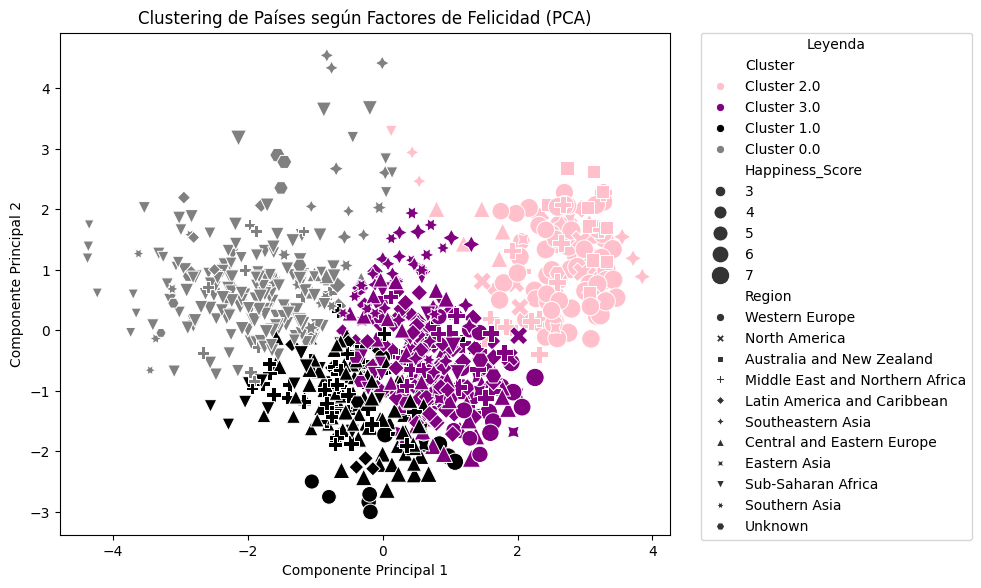

In [80]:
# Seleccionar factores para clustering
features = ['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 
            'Corruption_Perception', 'Generosity']
X = df[features].dropna()

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df.loc[X.index, 'Cluster'] = kmeans.fit_predict(X_scaled)

# Reducir dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear el gráfico con leyenda organizada
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], 
                          hue=df.loc[X.index, 'Cluster'].map({
                              0: 'Cluster 0.0', 
                              1: 'Cluster 1.0', 
                              2: 'Cluster 2.0', 
                              3: 'Cluster 3.0'
                          }), 
                          style=df.loc[X.index, 'Region'], 
                          size=df.loc[X.index, 'Happiness_Score'], 
                          palette=['pink', 'purple', 'black', 'gray'], 
                          sizes=(50, 200))

# Título y etiquetas
plt.title('Clustering de Países según Factores de Felicidad (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Ajustar la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Leyenda")
plt.tight_layout()
plt.show()

### Resumen de Clusters
Se calcula la media de las características y el puntaje de felicidad para cada cluster, proporcionando una descripción cuantitativa de las diferencias entre los grupos.

In [81]:
cluster_summary = df.groupby('Cluster')[features + ['Happiness_Score']].mean()
print("Resumen de Clusters:\n", cluster_summary)

Resumen de Clusters:
          GDP_per_Capita  Social_Support  Life_Expectancy   Freedom  \
Cluster                                                              
0.0            0.416314        0.750915         0.307171  0.344016   
1.0            1.022291        1.048821         0.672839  0.267385   
2.0            1.389451        1.343162         0.854546  0.586881   
3.0            1.042683        1.255688         0.715363  0.490667   

         Corruption_Perception  Generosity  Happiness_Score  
Cluster                                                      
0.0                   0.110878    0.249069         4.184215  
1.0                   0.072194    0.127054         5.180128  
2.0                   0.307898    0.336537         6.881669  
3.0                   0.090231    0.203530         5.837973  


## Países más y menos felices por año


Análisis: Países Más y Menos Felices por Año


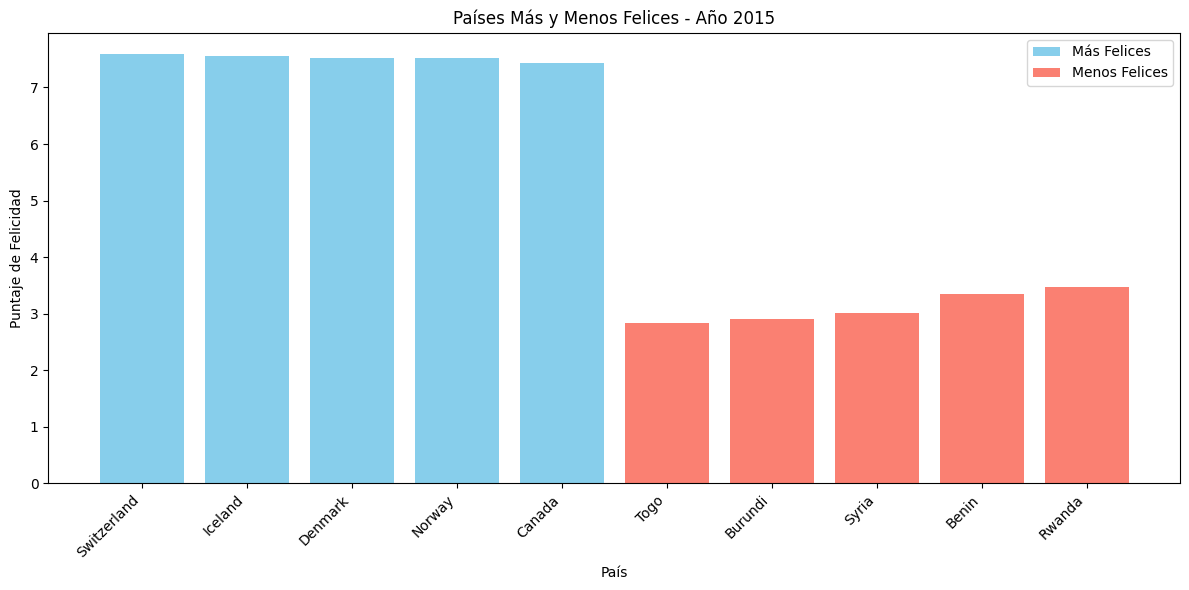

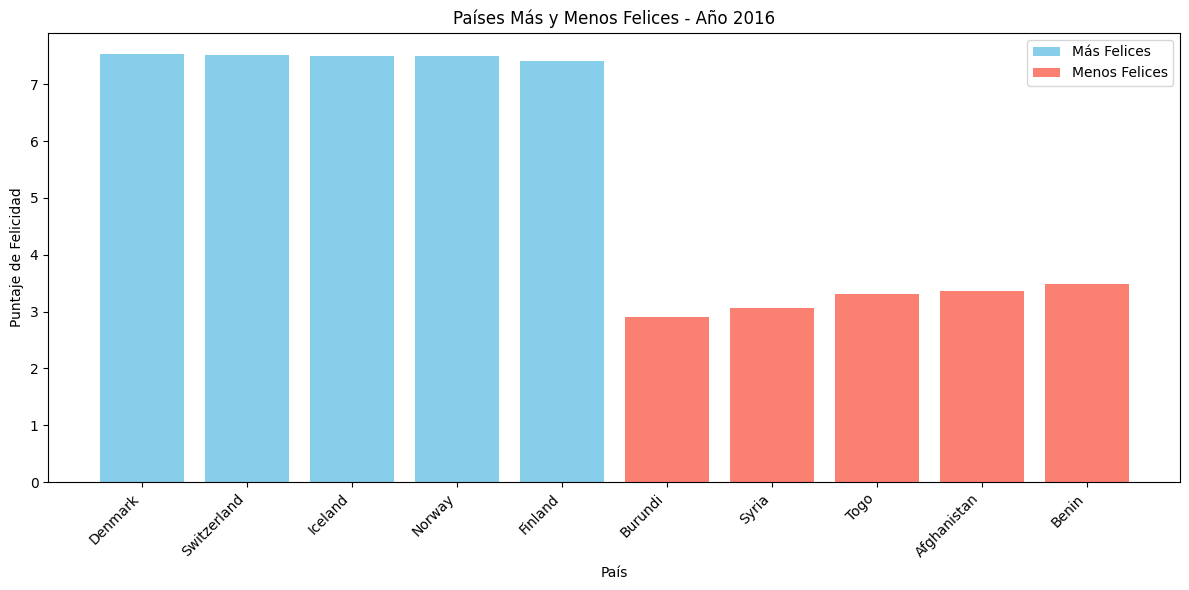

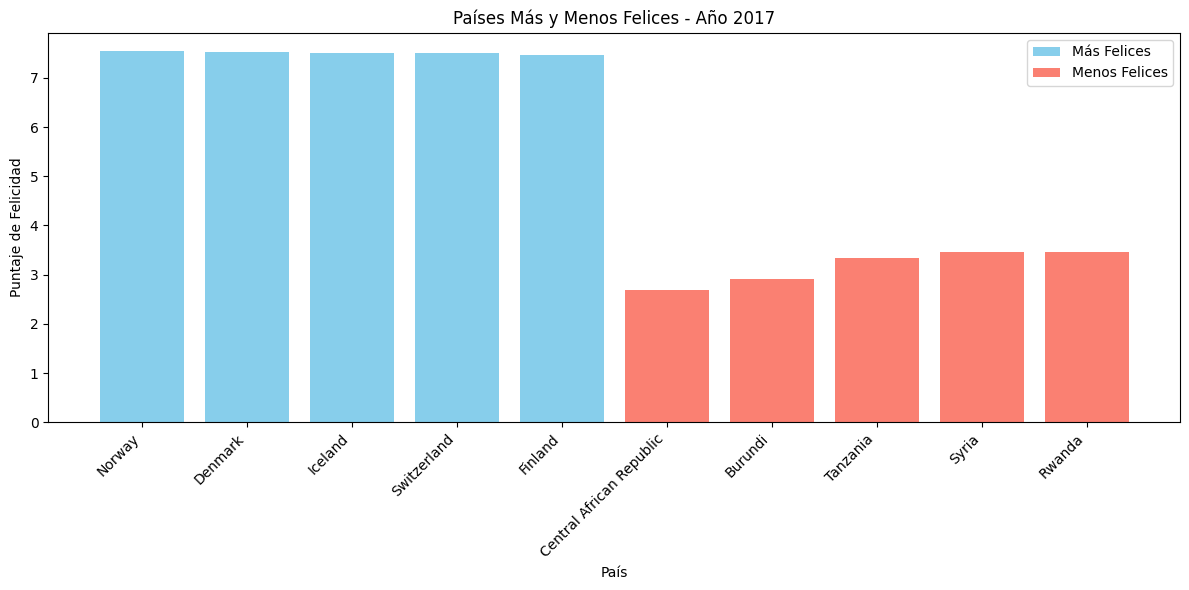

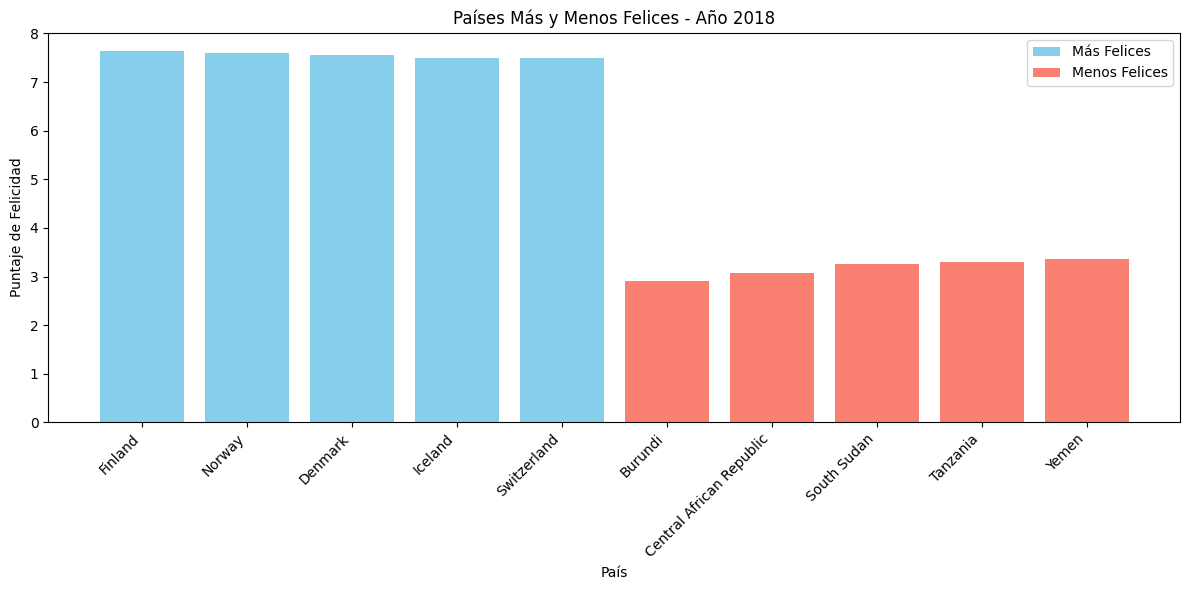

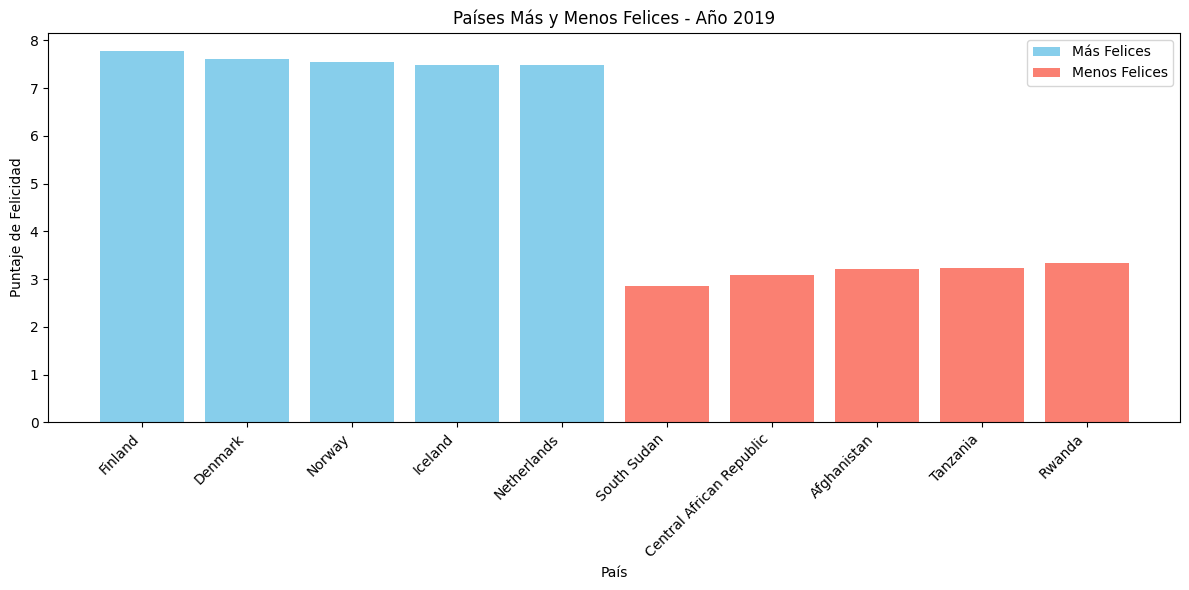

Los países más felices, como Finlandia y Dinamarca, muestran altos puntajes debido a economías fuertes, apoyo social y libertad. Países como Burundi y Sudán del Sur enfrentan pobreza y conflictos, resultando en bajos puntajes.


In [82]:
def plot_top_bottom_countries(df, years):
    for year in years:
        year_data = df[df['Year'] == year].sort_values(by='Happiness_Score', ascending=False)
        top_5 = year_data.head(5)
        bottom_5 = year_data.tail(5).iloc[::-1]  # Invertir para mejor visualización
        
        plt.figure(figsize=(12, 6))
        plt.bar(top_5['Country'], top_5['Happiness_Score'], label='Más Felices', color='skyblue')
        plt.bar(bottom_5['Country'], bottom_5['Happiness_Score'], label='Menos Felices', color='salmon')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('País')
        plt.ylabel('Puntaje de Felicidad')
        plt.title(f'Países Más y Menos Felices - Año {year}')
        plt.legend()
        plt.tight_layout()
        plt.show()

years = [2015, 2016, 2017, 2018, 2019]
print("\nAnálisis: Países Más y Menos Felices por Año")
plot_top_bottom_countries(df, years)
print("Los países más felices, como Finlandia y Dinamarca, muestran altos puntajes debido a economías fuertes, apoyo social y libertad. Países como Burundi y Sudán del Sur enfrentan pobreza y conflictos, resultando en bajos puntajes.")

## Relación entre Happiness Score y GDP per Cápita

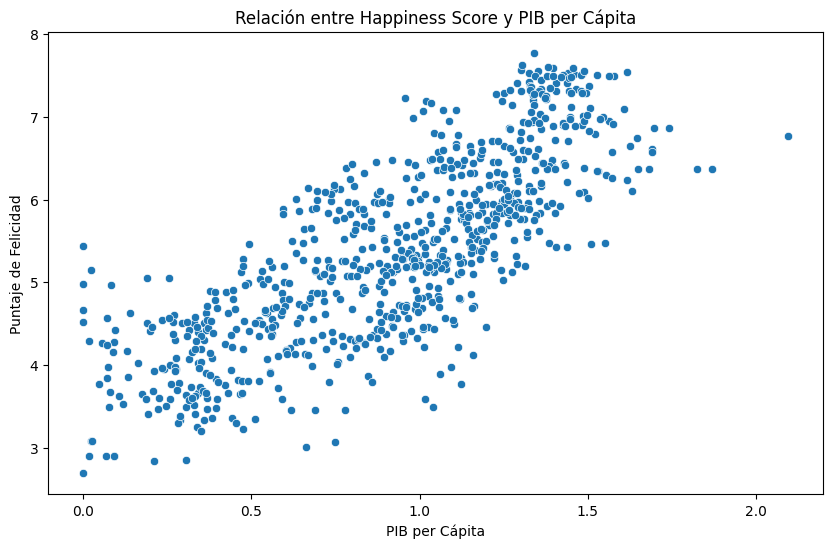


Correlación entre Happiness Score y PIB per Cápita: 0.7893
Existe una correlación positiva entre el PIB per cápita y la felicidad, pero países como Costa Rica logran alta felicidad con PIB moderado debido a apoyo social y libertad.


In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_Capita', y='Happiness_Score', data=df)
plt.xlabel('PIB per Cápita')
plt.ylabel('Puntaje de Felicidad')
plt.title('Relación entre Happiness Score y PIB per Cápita')
plt.show()

corr_gdp, _ = pearsonr(df['GDP_per_Capita'], df['Happiness_Score'])
print(f"\nCorrelación entre Happiness Score y PIB per Cápita: {corr_gdp:.4f}")
print("Existe una correlación positiva entre el PIB per cápita y la felicidad, pero países como Costa Rica logran alta felicidad con PIB moderado debido a apoyo social y libertad.")

## Relación entre Generosity y Happiness Score 

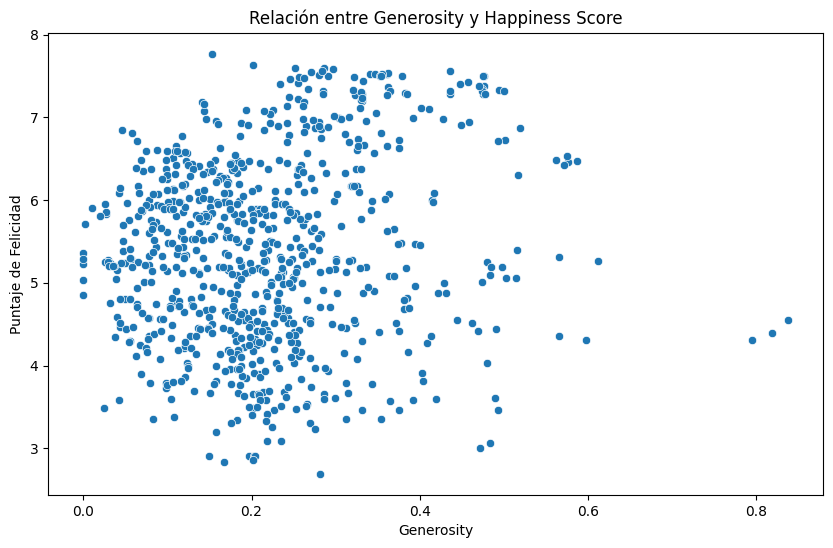


Correlación entre Generosity y Happiness Score: 0.1376
La correlación baja indica que la generosidad no es un factor determinante en la felicidad. Factores como el apoyo social y el PIB tienen mayor impacto.


In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Generosity', y='Happiness_Score', data=df)
plt.xlabel('Generosity')
plt.ylabel('Puntaje de Felicidad')
plt.title('Relación entre Generosity y Happiness Score')
plt.show()

corr_generosity, _ = pearsonr(df['Generosity'], df['Happiness_Score'])
print(f"\nCorrelación entre Generosity y Happiness Score: {corr_generosity:.4f}")
print("La correlación baja indica que la generosidad no es un factor determinante en la felicidad. Factores como el apoyo social y el PIB tienen mayor impacto.")

## Distribución de Generosity por Región

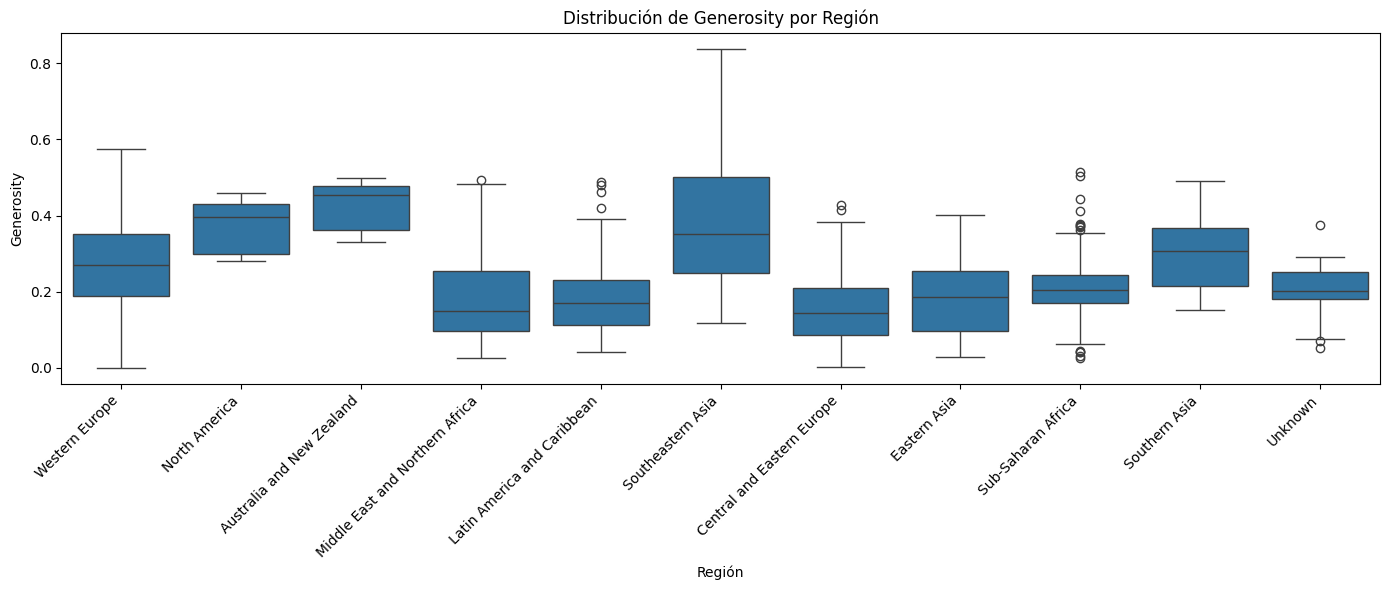


Análisis: Distribución de Generosity por Región
Regiones como el Sudeste Asiático y América Latina muestran mayor generosidad, posiblemente por factores culturales. Europa del Este y Asia Central tienen valores más bajos.


In [85]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Region', y='Generosity', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Región')
plt.ylabel('Generosity')
plt.title('Distribución de Generosity por Región')
plt.tight_layout()
plt.show()

print("\nAnálisis: Distribución de Generosity por Región")
print("Regiones como el Sudeste Asiático y América Latina muestran mayor generosidad, posiblemente por factores culturales. Europa del Este y Asia Central tienen valores más bajos.")

## Tendencias de felicidad por región

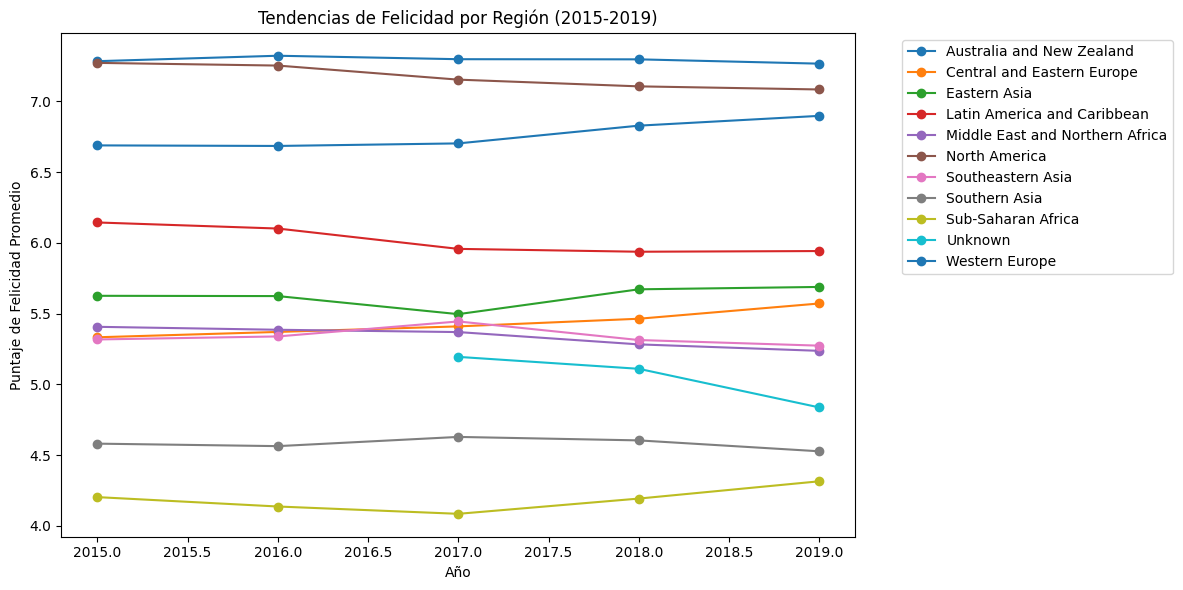


Análisis: Tendencias de Felicidad por Región
Europa Occidental lidera en felicidad, mientras que África Subsahariana muestra los puntajes más bajos. América Latina mantiene puntajes estables gracias al apoyo social.


In [86]:
regional_trends = df.groupby(['Region', 'Year'])['Happiness_Score'].mean().unstack()
plt.figure(figsize=(12, 6))
for region in regional_trends.index:
    plt.plot(regional_trends.columns, regional_trends.loc[region], marker='o', label=region)
plt.xlabel('Año')
plt.ylabel('Puntaje de Felicidad Promedio')
plt.title('Tendencias de Felicidad por Región (2015-2019)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nAnálisis: Tendencias de Felicidad por Región")
print("Europa Occidental lidera en felicidad, mientras que África Subsahariana muestra los puntajes más bajos. América Latina mantiene puntajes estables gracias al apoyo social.")

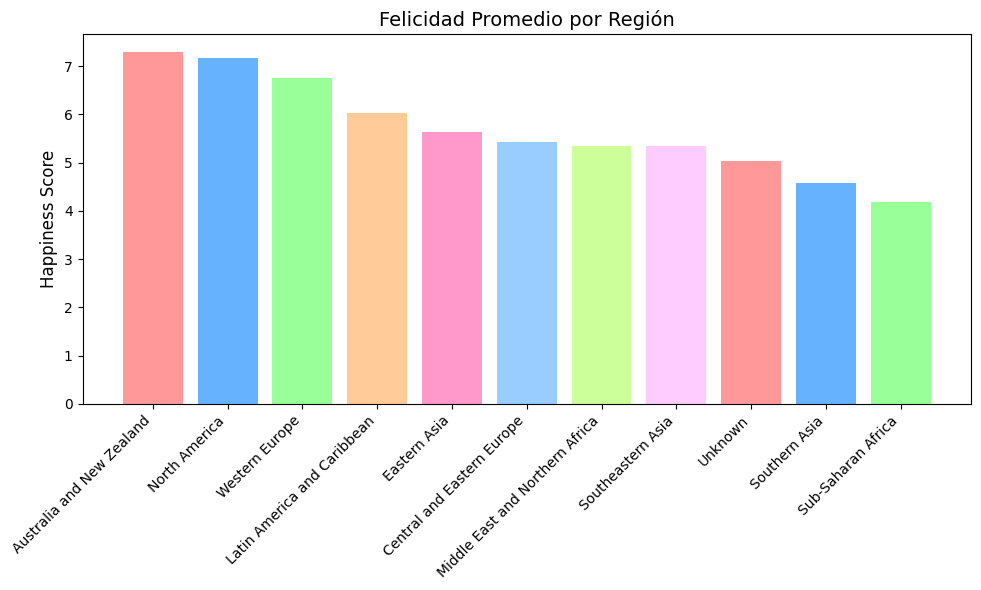

In [87]:

happiness_by_region = df.groupby('Region')['Happiness_Score'].mean().sort_values(ascending=False)

# Definimos los colores para cada región
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF', '#CCFF99', '#FFCCFF']

plt.figure(figsize=(10, 6))
bars = plt.bar(happiness_by_region.index, happiness_by_region.values, color=colors)


plt.title("Felicidad Promedio por Región", fontsize=14)
plt.ylabel("Happiness Score", fontsize=12)
plt.xticks(rotation=45, ha='right')


plt.tight_layout()

plt.show()

## Tabla de puntajes promedio por región

In [88]:
regional_avg = df.groupby('Region')['Happiness_Score'].mean().sort_values(ascending=False)
print("\nPuntajes Promedio de Felicidad por Región:")
print(regional_avg.round(2).to_string())


Puntajes Promedio de Felicidad por Región:
Region
Australia and New Zealand          7.29
North America                      7.17
Western Europe                     6.76
Latin America and Caribbean        6.02
Eastern Asia                       5.63
Central and Eastern Europe         5.43
Middle East and Northern Africa    5.34
Southeastern Asia                  5.34
Unknown                            5.04
Southern Asia                      4.58
Sub-Saharan Africa                 4.19


In [89]:
region_avg = df.groupby("Region")[[
    "Happiness_Score", "GDP_per_Capita", "Social_Support",
    "Life_Expectancy", "Freedom", "Corruption_Perception",
    "Generosity"
]].mean().sort_values("Happiness_Score", ascending=False)

print(region_avg)


                                 Happiness_Score  GDP_per_Capita  \
Region                                                             
Australia and New Zealand               7.294600        1.356197   
North America                           7.174700        1.422037   
Western Europe                          6.759311        1.372702   
Latin America and Caribbean             6.021935        0.937901   
Eastern Asia                            5.630464        1.219484   
Central and Eastern Europe              5.428875        1.018734   
Middle East and Northern Africa         5.337208        1.102633   
Southeastern Asia                       5.335227        0.893340   
Unknown                                 5.036105        0.774611   
Southern Asia                           4.580657        0.638813   
Sub-Saharan Africa                      4.186027        0.450237   

                                 Social_Support  Life_Expectancy   Freedom  \
Region                               

## Verificar si hay datos de múltiples años

In [90]:
if 'Year' in df.columns:
    trend_by_year = df.groupby("Year")["Happiness_Score"].mean()
    print(trend_by_year)


Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
Name: Happiness_Score, dtype: float64


## Top 10 países más felices

In [91]:
top_10 = df.sort_values("Happiness_Score", ascending=False)[["Country", "Happiness_Score"]].head(10)
print("TOP 10 Países más felices:\n", top_10)


TOP 10 Países más felices:
          Country  Happiness_Score
626      Finland            7.769
470      Finland            7.632
627      Denmark            7.600
471       Norway            7.594
0    Switzerland            7.587
1        Iceland            7.561
472      Denmark            7.555
628       Norway            7.554
315       Norway            7.537
2        Denmark            7.527


## Bottom 10 países menos felices

In [37]:
bottom_10 = df.sort_values("Happiness_Score", ascending=True)[["Country", "Happiness_Score"]].head(10)
print("BOTTOM 10 Países menos felices:\n", bottom_10)


BOTTOM 10 Países menos felices:
                       Country  Happiness_Score
469  Central African Republic            2.693
157                      Togo            2.839
781               South Sudan            2.853
468                   Burundi            2.905
156                   Burundi            2.905
314                   Burundi            2.905
625                   Burundi            2.905
155                     Syria            3.006
313                     Syria            3.069
624  Central African Republic            3.083


## Relación directa entre Happiness_Score y otros factores

In [92]:
for col in ["GDP_per_Capita", "Social_Support", "Life_Expectancy", 
            "Freedom", "Corruption_Perception", "Generosity"]:
    corr = df["Happiness_Score"].corr(df[col])
    print(f"Correlación entre Happiness_Score y {col}: {corr:.2f}")


Correlación entre Happiness_Score y GDP_per_Capita: 0.79
Correlación entre Happiness_Score y Social_Support: 0.65
Correlación entre Happiness_Score y Life_Expectancy: 0.74
Correlación entre Happiness_Score y Freedom: 0.55
Correlación entre Happiness_Score y Corruption_Perception: 0.40
Correlación entre Happiness_Score y Generosity: 0.14


## Número de países por región
## Si hay columna de año

In [94]:
paises_por_region = df["Region"].value_counts()
print("\nNúmero de países por región:\n", paises_por_region)

if 'Year' in df.columns:
    entries_por_anio = df["Year"].value_counts().sort_index()
    print("\nCantidad de entradas por año:\n", entries_por_anio)



Número de países por región:
 Region
Sub-Saharan Africa                 186
Central and Eastern Europe         144
Latin America and Caribbean        107
Western Europe                     103
Middle East and Northern Africa     96
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        28
Unknown                             19
Australia and New Zealand           10
North America                       10
Name: count, dtype: int64

Cantidad de entradas por año:
 Year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: count, dtype: int64


## Clasificar en grupos: Alto, Medio, Bajo según Happiness_Score
 Recuento por grupo

In [95]:
df["Happiness_Level"] = pd.cut(
    df["Happiness_Score"],
    bins=[0, 4.5, 6.5, 10],
    labels=["Bajo", "Medio", "Alto"]
)

nivel_felicidad = df["Happiness_Level"].value_counts()
print("\nDistribución de niveles de felicidad:\n", nivel_felicidad)



Distribución de niveles de felicidad:
 Happiness_Level
Medio    456
Bajo     193
Alto     133
Name: count, dtype: int64


In [96]:
df.head()

,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Cluster,Happiness_Level
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,2.0,Alto
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,2.0,Alto
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,2.0,Alto
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,2.0,Alto
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,2.0,Alto


# Clasificación de Felicidad

  clasifica un puntaje de felicidad en categorías ("feliz", "neutral" o "triste") y lo aplica a una columna de un DataFrame:

In [97]:
def clasificar_felicidad(score):
    if score >= 7:
        return "feliz"
    elif score >= 4:
        return "neutral"
    else:
        return "triste"

df['Happiness Category'] = df['Happiness_Score'].apply(clasificar_felicidad)


## índice de felicidad por región con colores personalizados para visualización.

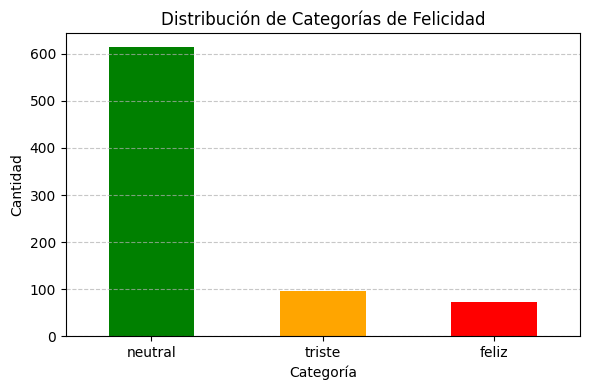

In [98]:
# Contar ocurrencias por categoría
categoria_counts = df['Happiness Category'].value_counts()

# Graficar
plt.figure(figsize=(6, 4))
categoria_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribución de Categorías de Felicidad")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [99]:
fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='Happiness Category',
    hover_name='Country',
    color_discrete_map={
        'feliz': 'green',
        'neutral': 'orange',
        'triste': 'red'
    },
    title='Mapa Mundial de la Felicidad por Categoría'
)
fig.show()


In [100]:
df.head()

,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Cluster,Happiness_Level,Happiness Category
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,2.0,Alto,feliz
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,2.0,Alto,feliz
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,2.0,Alto,feliz
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,2.0,Alto,feliz
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,2.0,Alto,feliz


## Distribución de las variables

In [101]:
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())


Country
Switzerland                 5
Iceland                     5
Denmark                     5
Norway                      5
Canada                      5
                           ..
Puerto Rico                 1
Hong Kong S.A.R., China     1
Taiwan Province of China    1
North Macedonia             1
Gambia                      1
Name: count, Length: 170, dtype: int64
Region
Sub-Saharan Africa                 186
Central and Eastern Europe         144
Latin America and Caribbean        107
Western Europe                     103
Middle East and Northern Africa     96
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        28
Unknown                             19
Australia and New Zealand           10
North America                       10
Name: count, dtype: int64
Happiness Category
neutral    614
triste      96
feliz       72
Name: count, dtype: int64


 ## Cálculo del promedio de múltiples indicadores por región ordenado por nivel de felicidad.

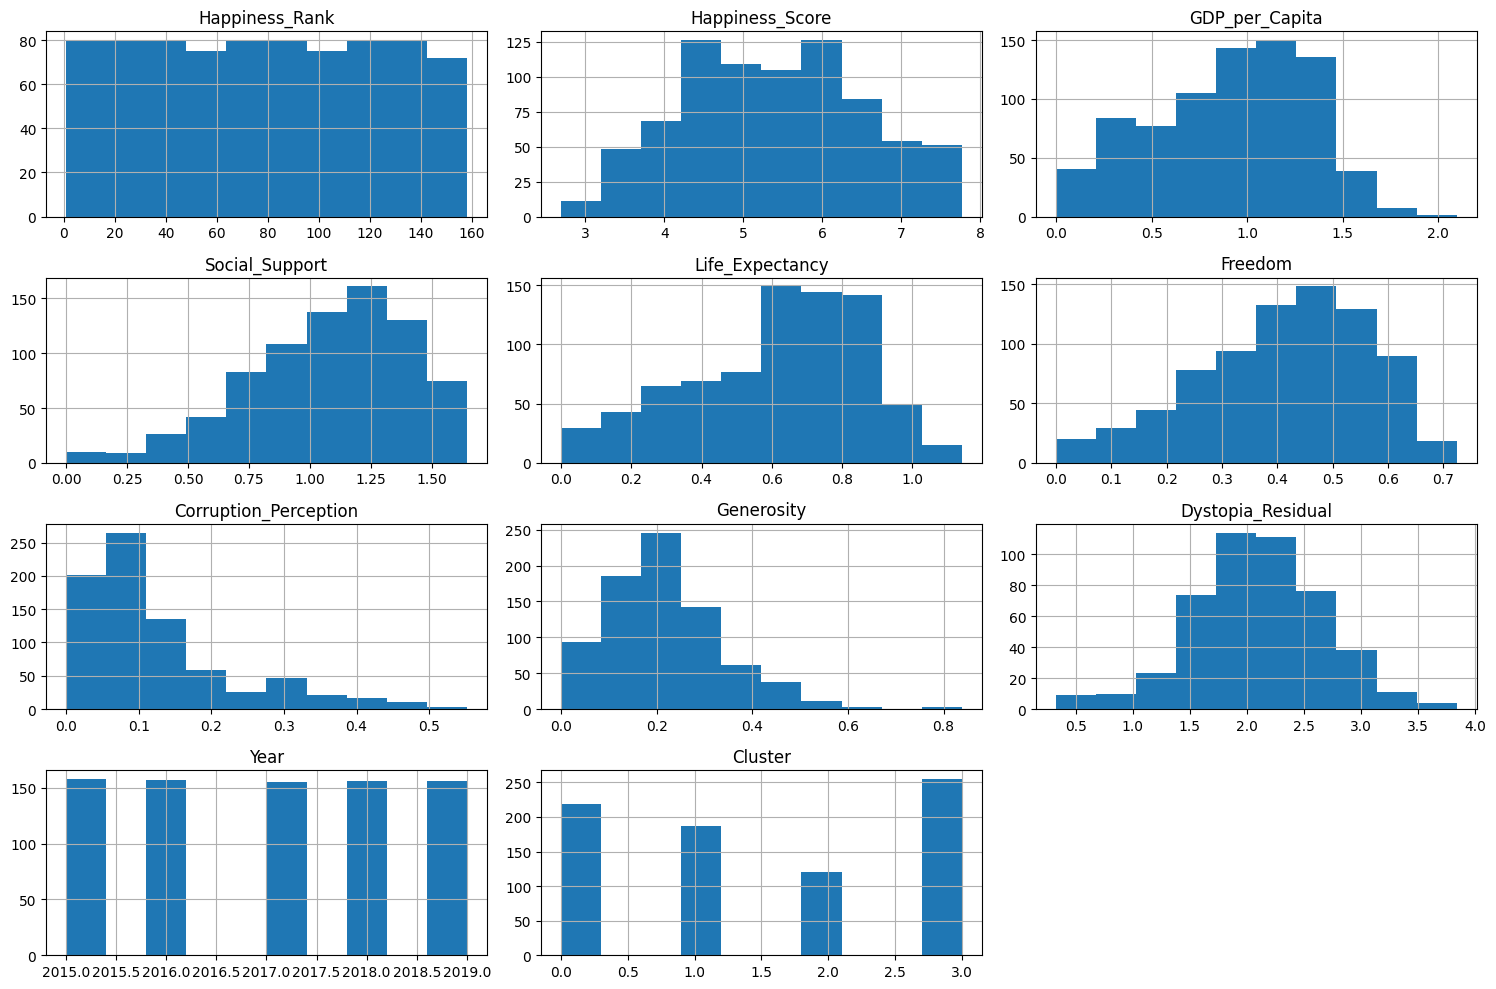

In [102]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


## Correlaciones entre variables


In [103]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix)


                       Happiness_Rank  Happiness_Score  GDP_per_Capita  \
Happiness_Rank               1.000000        -0.992066       -0.794791   
Happiness_Score             -0.992066         1.000000        0.789284   
GDP_per_Capita              -0.794791         0.789284        1.000000   
Social_Support              -0.644842         0.648799        0.585966   
Life_Expectancy             -0.743655         0.742456        0.784338   
Freedom                     -0.537942         0.551258        0.340511   
Corruption_Perception       -0.371654         0.397333        0.303099   
Generosity                  -0.117713         0.137578       -0.014560   
Dystopia_Residual           -0.482706         0.489747        0.030087   
Year                        -0.007768         0.007065        0.019768   
Cluster                     -0.657203         0.636070        0.601030   

                       Social_Support  Life_Expectancy   Freedom  \
Happiness_Rank              -0.644842      

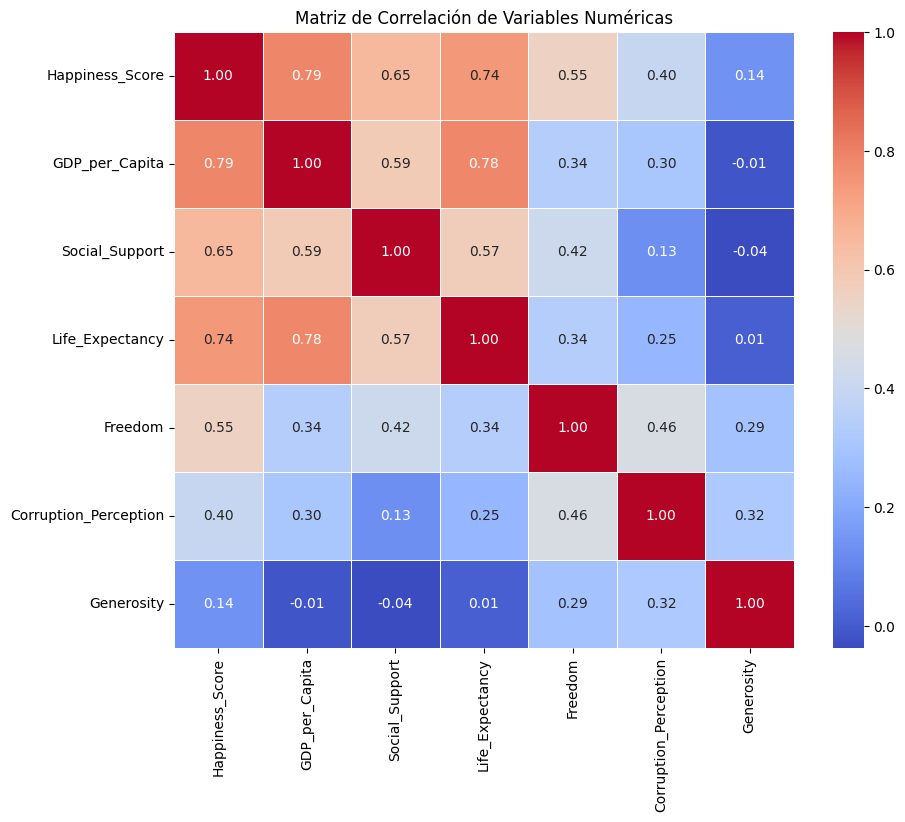

In [104]:

numeric_cols = ['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 
                'Freedom', 'Corruption_Perception', 'Generosity']

correlation_matrix = df[numeric_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Detección de Outliers


## Boxplots para detectar valores atípicos:

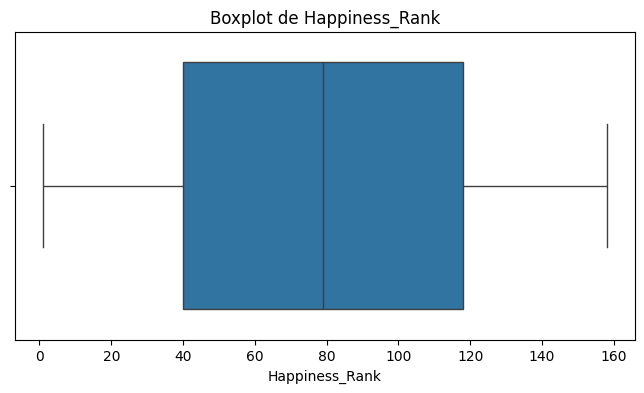

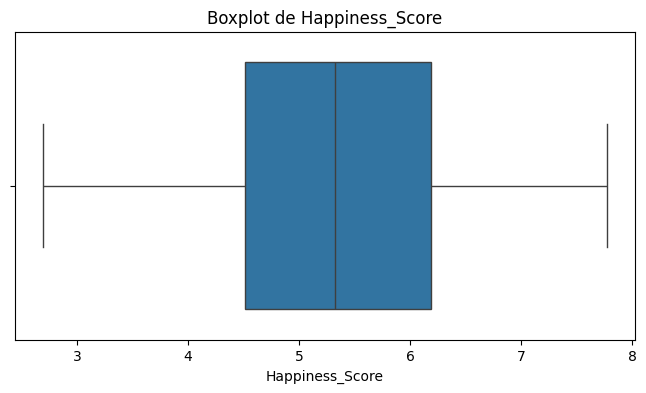

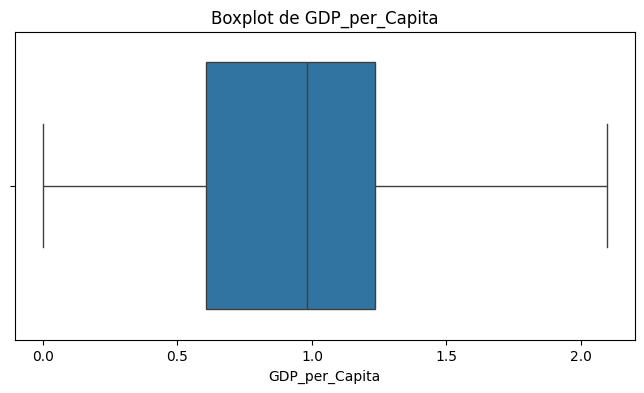

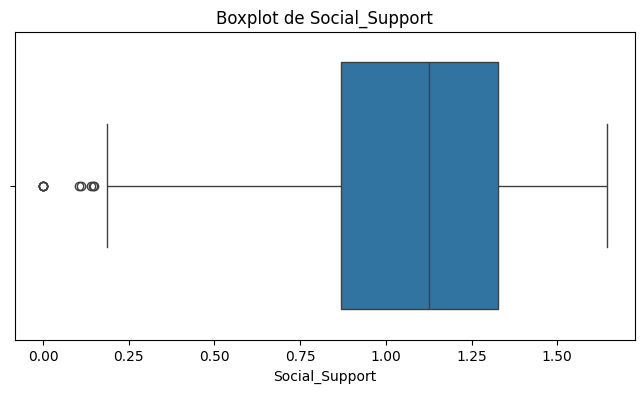

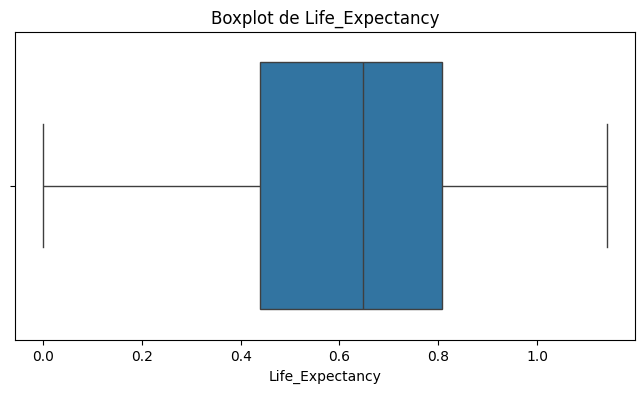

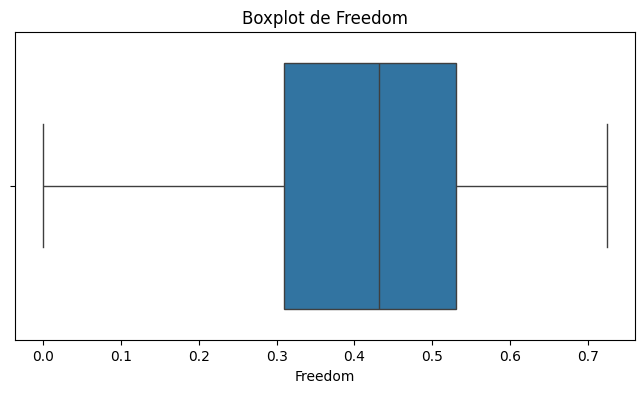

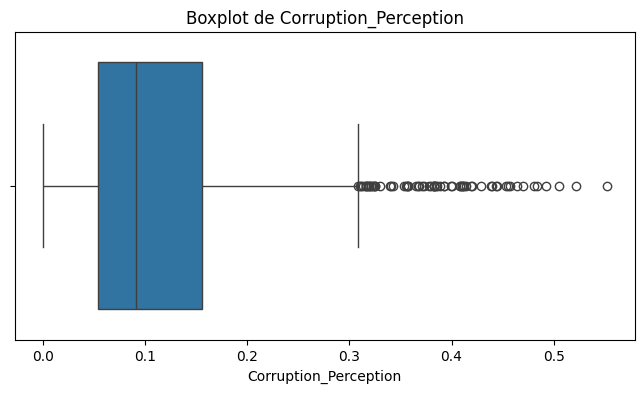

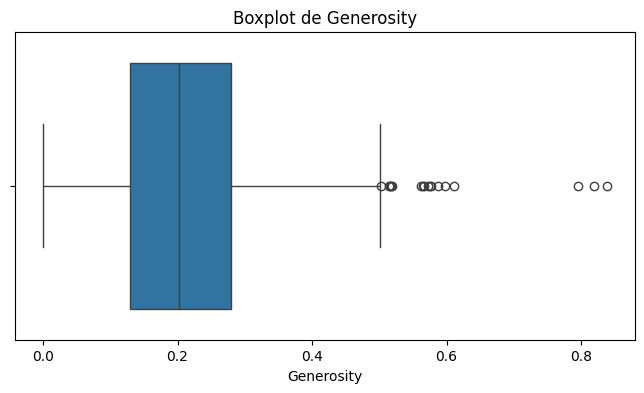

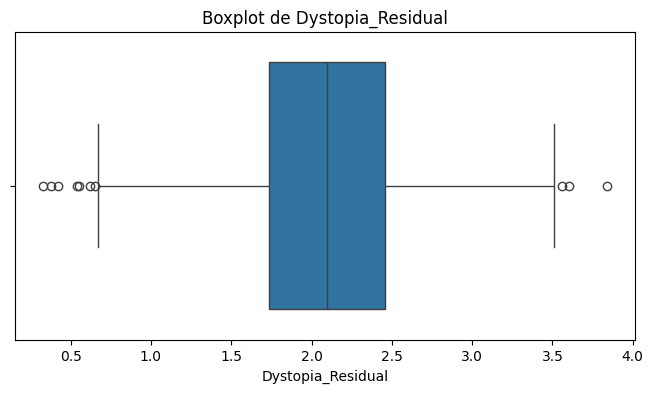

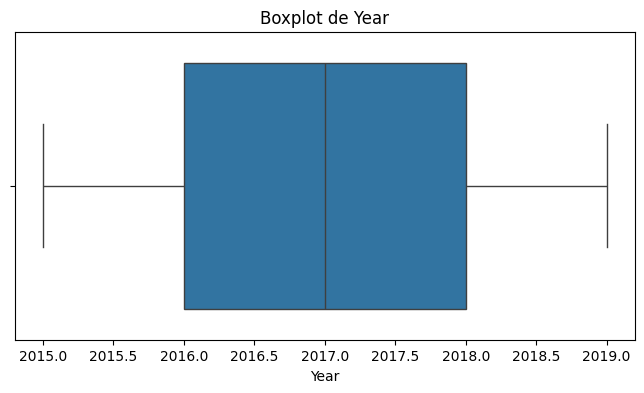

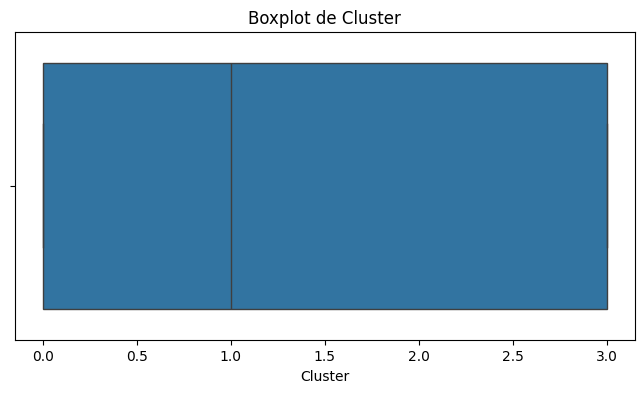

In [106]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


 ## Análisis de métricas

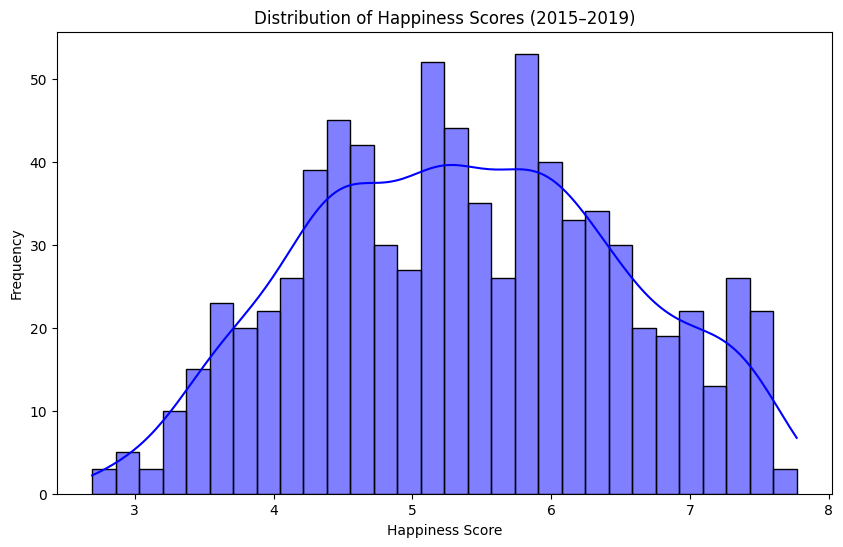

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Happiness_Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Happiness Scores (2015–2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

## Calcular el Happiness Score promedio por región y año

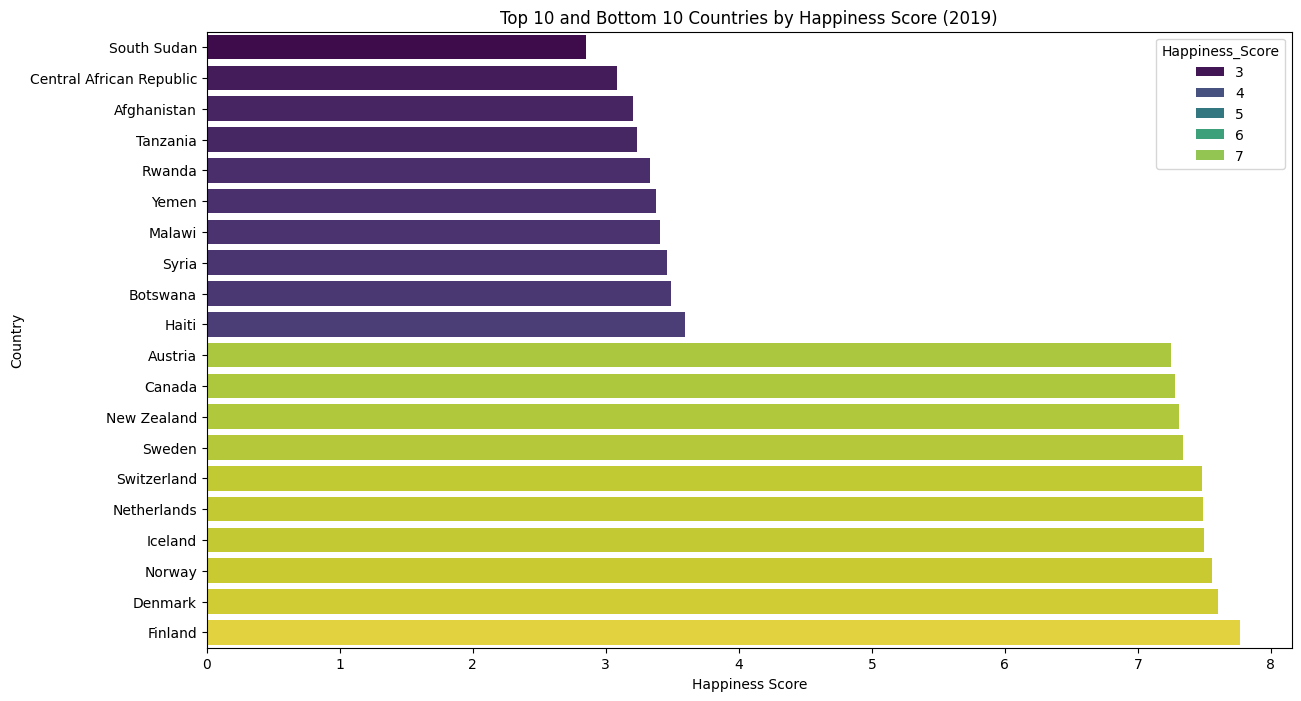

In [108]:
df_2019 = df[df['Year'] == 2019].sort_values('Happiness_Score')
top_bottom = pd.concat([df_2019.head(10), df_2019.tail(10)])
plt.figure(figsize=(14, 8))
sns.barplot(x='Happiness_Score', y='Country', hue='Happiness_Score', data=top_bottom, palette='viridis')
plt.title('Top 10 and Bottom 10 Countries by Happiness Score (2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

## Visualización de Factores de Felicidad
Se genera un gráfico de barras apiladas para los factores de felicidad de los 5 países con mayor puntaje en 2019.

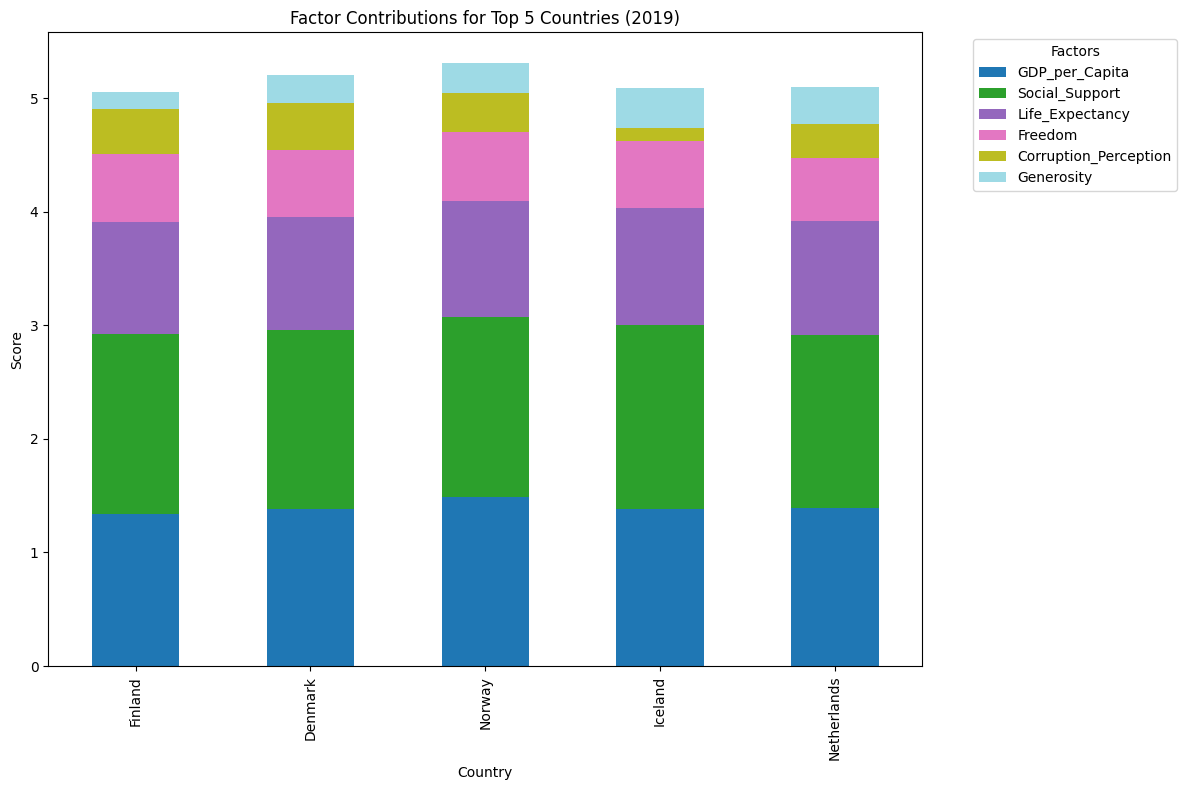

In [ ]:

top_5 = df[df['Year'] == 2019].nlargest(5, 'Happiness_Score')
factors = ['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption_Perception', 'Generosity']
top_5_factors = top_5[['Country'] + factors].set_index('Country')


ax = top_5_factors.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')


plt.title('Factor Contributions for Top 5 Countries (2019)')
plt.xlabel('Country')
plt.ylabel('Score')


handles, labels = ax.get_legend_handles_labels()
ordered_factors = factors 
ordered_handles = [handles[labels.index(f)] for f in ordered_factors]
ax.legend(ordered_handles, ordered_factors, title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  
plt.show()


##  Frecuencia de regiones

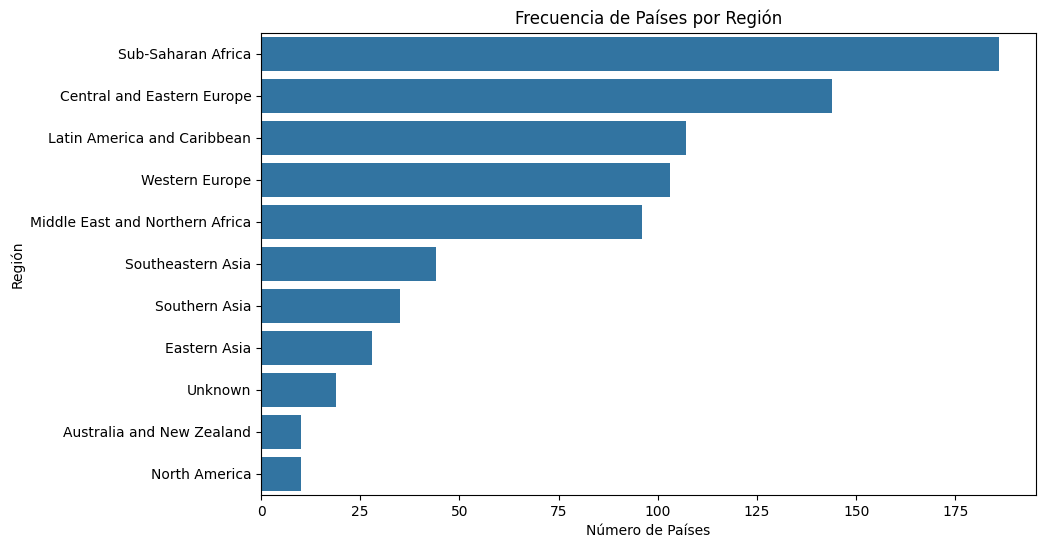

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Region', data=df, order=df['Region'].value_counts().index)
plt.title('Frecuencia de Países por Región')
plt.xlabel('Número de Países')
plt.ylabel('Región')
plt.show()


##  Diagrama de dispersión para Happiness_Score vs GDP_per_Capita

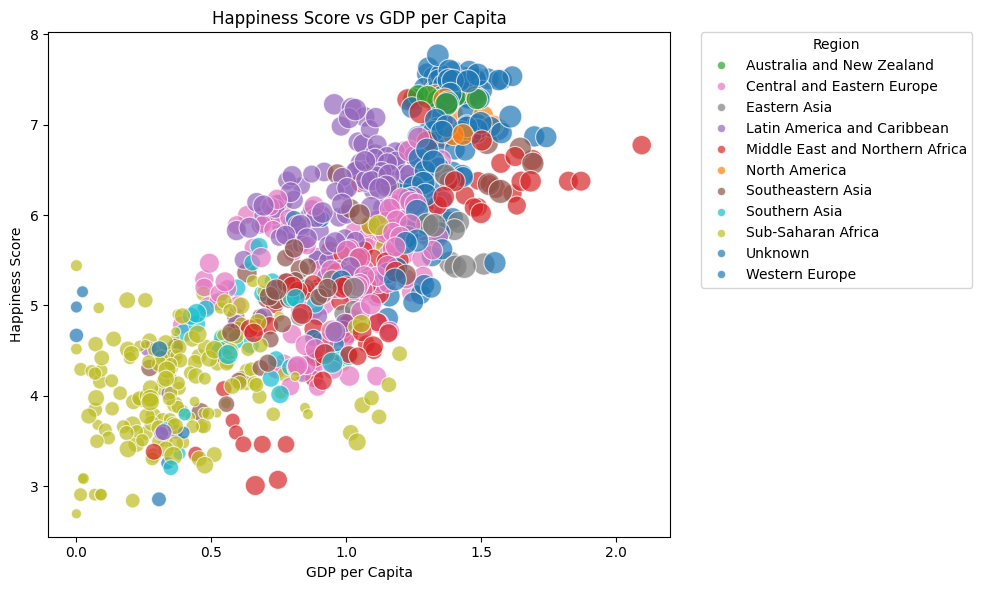

In [ ]:

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='GDP_per_Capita',
    y='Happiness_Score',
    data=df,
    hue='Region',
    size='Life_Expectancy',
    sizes=(50, 300),
    palette='tab10',
    alpha=0.7
)

plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')

# Obtener y organizar leyenda de regiones (hue), excluyendo NaN
hue_labels = sorted(df['Region'].dropna().unique())
handles, labels = scatter.get_legend_handles_labels()

# Obtener solo los handles correspondientes a las regiones
hue_handles = [handles[labels.index(label)] for label in hue_labels if label in labels]


plt.legend(
    hue_handles, hue_labels,
    title='Region',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()


## Distribución de Happiness_Score por región

In [ ]:
region_stats = df.groupby('Region')['Happiness_Score'].describe()
print("Estadísticas de Happiness Score por Región:\n", region_stats)

Estadísticas de Happiness Score por Región:
                                  count      mean       std    min      25%  \
Region                                                                       
Australia and New Zealand         10.0  7.294600  0.030787  7.228  7.28400   
Central and Eastern Europe       144.0  5.428875  0.587102  4.096  5.12775   
Eastern Asia                      28.0  5.630464  0.472521  4.874  5.24575   
Latin America and Caribbean      107.0  6.021935  0.734054  3.582  5.74300   
Middle East and Northern Africa   96.0  5.337208  1.022185  3.006  4.69500   
North America                     10.0  7.174700  0.204057  6.886  7.02075   
Southeastern Asia                 44.0  5.335227  0.801819  3.819  4.77200   
Southern Asia                     35.0  4.580657  0.587753  3.203  4.34050   
Sub-Saharan Africa               186.0  4.186027  0.590168  2.693  3.77650   
Unknown                           19.0  5.036105  1.022329  2.853  4.54500   
Western Europe     

## Boxplot de Happiness Score por Región

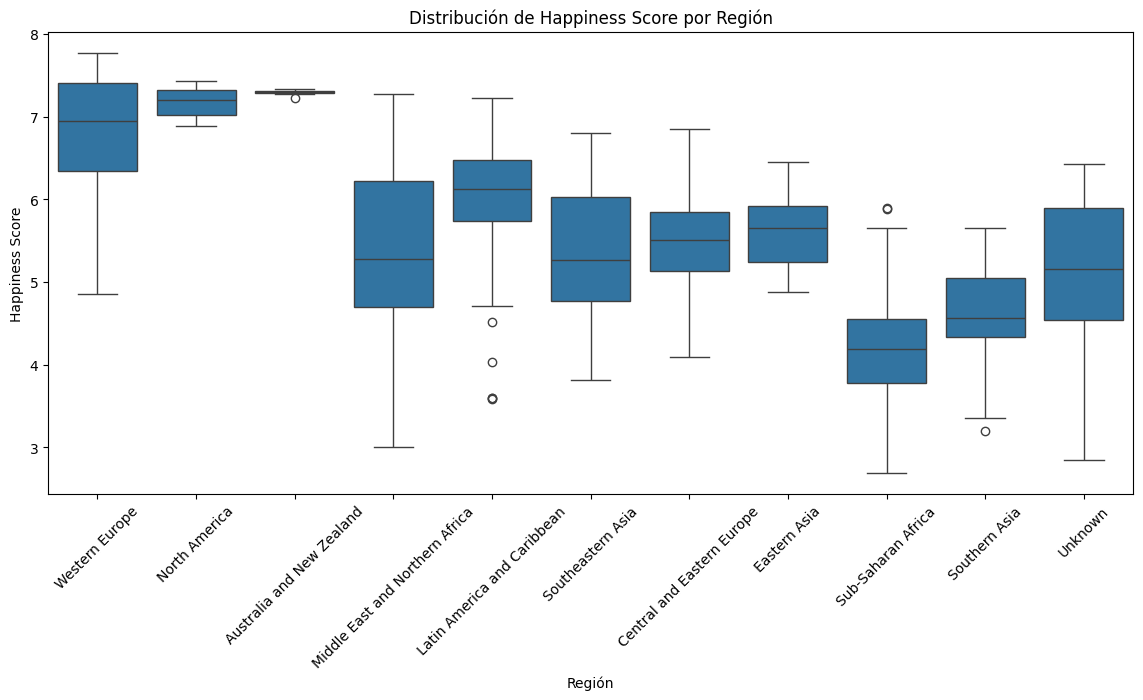

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Region', y='Happiness_Score', data=df)
plt.xticks(rotation=45)
plt.title('Distribución de Happiness Score por Región')
plt.xlabel('Región')
plt.ylabel('Happiness Score')
plt.show()

## Tendencia de Happiness_Score por año

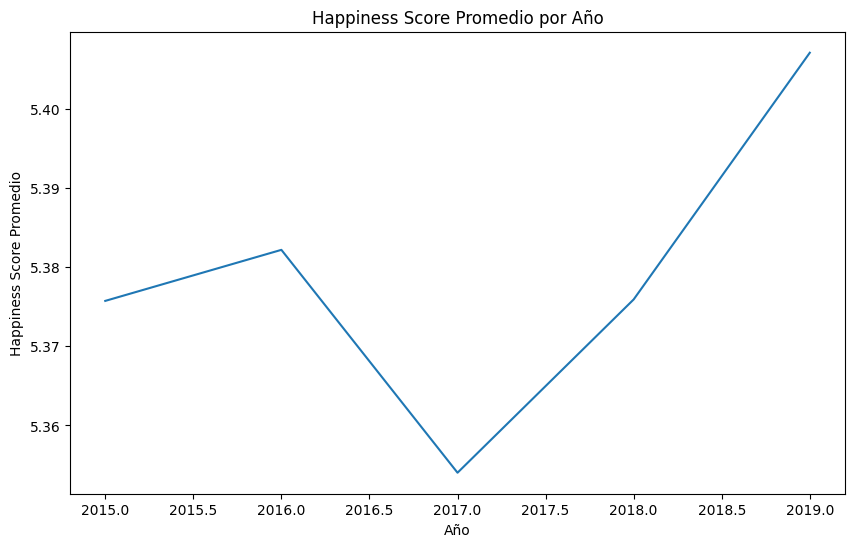

In [ ]:
# Resumen estadístico por año
yearly_stats = df.groupby('Year')[['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 
                                   'Life_Expectancy', 'Freedom', 'Corruption_Perception', 
                                   'Generosity']].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_stats.index, y=yearly_stats['Happiness_Score'])
plt.title('Happiness Score Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Happiness Score Promedio')
plt.show()


## Tendencia para los 5 países más felices en 2019

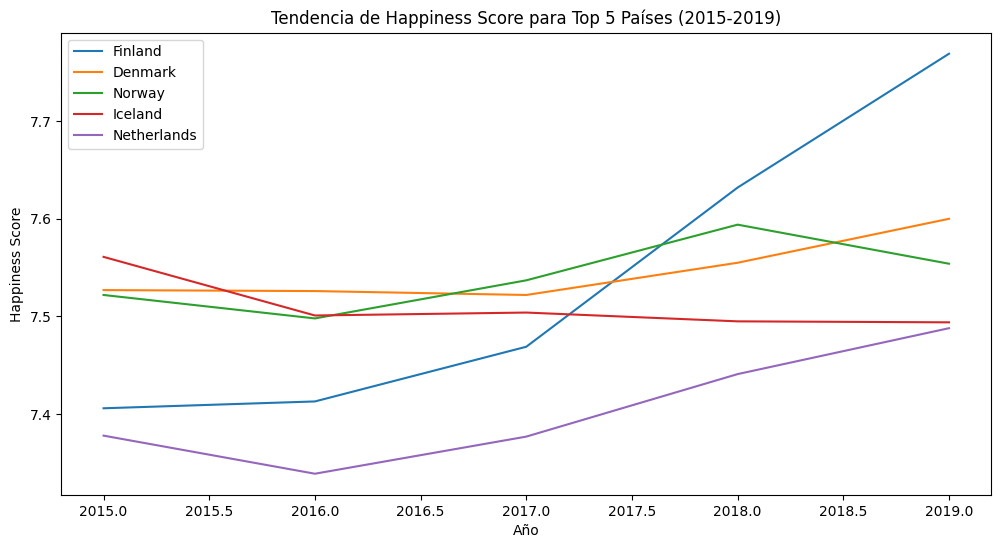

In [115]:
top_5_countries = top_5['Country'].tolist()
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data = df[df['Country'] == country]
    sns.lineplot(x='Year', y='Happiness_Score', data=country_data, label=country)
plt.title('Tendencia de Happiness Score para Top 5 Países (2015-2019)')
plt.xlabel('Año')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

###  Seleccionar los top 5 países basados en Happiness Score promedio

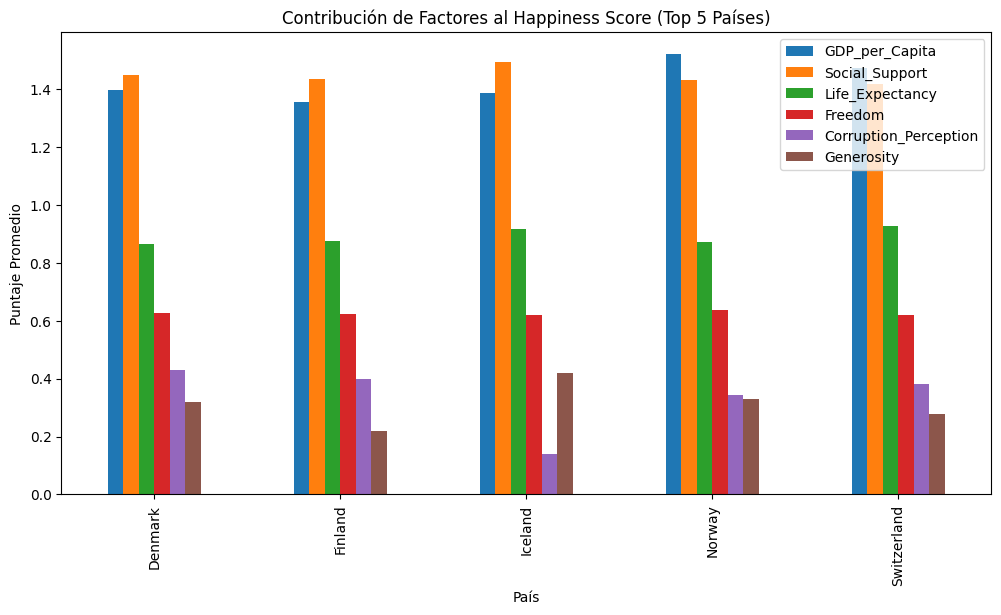

In [ ]:
top_5 = df.groupby('Country')['Happiness_Score'].mean().nlargest(5).index

# Factores a analizar
factors = ['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 
           'Corruption_Perception', 'Generosity']

# Calcular promedio de factores para los top 5 países
top_5_data = df[df['Country'].isin(top_5)][['Country'] + factors].groupby('Country').mean()


top_5_data.plot(kind='bar', figsize=(12, 6))
plt.title('Contribución de Factores al Happiness Score (Top 5 Países)')
plt.xlabel('País')
plt.ylabel('Puntaje Promedio')
plt.legend(loc='best')
plt.show()

In [ ]:
## Ordenar datos por país y año

In [ ]:
df_sorted = df.sort_values(['Country', 'Year'])

# Calcular la diferencia interanual en Happiness Score
df_sorted['Happiness_Score_Change'] = df_sorted.groupby('Country')['Happiness_Score'].diff()

# Identificar los 5 países con mayores aumentos y disminuciones
top_increases = df_sorted.nlargest(5, 'Happiness_Score_Change')[['Country', 'Year', 'Happiness_Score_Change']]
top_decreases = df_sorted.nsmallest(5, 'Happiness_Score_Change')[['Country', 'Year', 'Happiness_Score_Change']]

print("Mayores aumentos en Happiness Score:\n", top_increases)
print("\nMayores disminuciones en Happiness Score:\n", top_decreases)

Mayores aumentos en Happiness Score:
      Country  Year  Happiness_Score_Change
770  Burundi  2019                   0.870
195  Algeria  2016                   0.750
727    Benin  2019                   0.742
525  Jamaica  2018                   0.579
743   Guinea  2019                   0.570

Mayores disminuciones en Happiness Score:
                       Country  Year  Happiness_Score_Change
453                   Lesotho  2017                  -1.090
469  Central African Republic  2017                  -0.985
705                  Malaysia  2019                  -0.983
307                   Liberia  2016                  -0.949
396                 Venezuela  2017                  -0.834


## Guardar df limpio para reutilizar en el modelo
Se guarda el DataFrame procesado (tras eliminar columnas con muchos nulos y añadir nuevas columnas calculadas) en un archivo CSV para su uso en análisis o modelos futuros.

In [118]:
df.to_csv("C:/Users/Acer/OneDrive/Escritorio/Workshops y Proyectos/workshop3/datos/datos_procesados.csv", index=False)

Verificación del DataFrame Procesado
Se carga el archivo CSV guardado (datos_procesados.csv) y se muestran las primeras cinco filas para confirmar que los datos procesados se almacenaron correctamente.

In [119]:
df_proce = pd.read_csv("C:/Users/Acer/OneDrive/Escritorio/Workshops y Proyectos/workshop3/datos/datos_procesados.csv")
df_proce.head()

,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Cluster,Happiness_Level,Happiness Category
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,2.0,Alto,feliz
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,2.0,Alto,feliz
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,2.0,Alto,feliz
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,2.0,Alto,feliz
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,2.0,Alto,feliz


## Dimensiones del DataFrame Procesado
Se verifican las dimensiones del DataFrame procesado para confirmar el número de filas y columnas tras el procesamiento.

In [120]:
df_proce.shape

(782, 15)

## Conclusión
